<br><br>
<font size='6'><b>Autoencoder
</b></font><br><br>

<br>
<div class=pull-right>
By Prof. Seungchul Lee<br>
http://iai.postech.ac.kr/<br>
Industrial AI Lab at POSTECH
</div>

Table of Contents
<div id="toc"></div>

# 1. Unsupervised Learning

<br>

__Definition__

- Unsupervised learning refers to most attempts to extract information from a distribution that do not require human labor to annotate example
- Main task is to find the 'best' representation of the data

__Dimension Reduction__
- Attempt to compress as much information as possible in a smaller representation
- Preserve as much information as possible while obeying some constraint aimed at keeping the representation simpler

# 2. Autoencoders


It is like 'deep learning version' of unsupervised learning.


__Definition__

- An autoencoder is a neural network that is trained to attempt to copy its input to its output
- The network consists of two parts: an __encoder__ and a __decoder__ that produce a reconstruction


__Encoder and Decoder__

- Encoder function : $z = f(x)$
- Decoder function : $x = g(z)$
- We learn to set $g\left(f(x)\right) = x$

<br>
<center><img src="./image_files/autoencoder_before.png" width = 600></center>
<br>

<br>
<center><img src="./image_files/autoencoder.png" width = 600></center>
<br>

# 3. Autoencoder with TensorFlow

- MNIST example


- Use only (1, 5, 6) digits to visualize in 2-D


<br>
<center><img src="./image_files/AE_arch2.png" width = 800></center>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
%matplotlib inline

In [2]:
# Load Data


In [3]:
# Use Only 1,5,6 Digits to Visualize


(18081, 28, 28)

In [5]:
# Flattening


## 3.1. Define a Structure of an Autoencoder
- Input shape and latent variable shape
- Encoder shape
- Decoder shape

<br>
<center><img src="./image_files/AE_arch2.png" width = 700></center>

In [6]:
# Define Structure

# Encoder Structure

# Decoder Structure

# Autoencoder = Encoder + Decoder


## 3.2. Define Loss and Optimizer

__Loss__

- Squared loss


$$  \frac{1}{m}\sum_{i=1}^{m} (t_{i} - y_{i})^2 $$


__Optimizer__

- AdamOptimizer: the most popular optimizer

Epoch 1/10
362/362 [==============================] - 2s 4ms/step - loss: 0.0375
Epoch 2/10
362/362 [==============================] - 1s 4ms/step - loss: 0.0304
Epoch 3/10
362/362 [==============================] - 2s 4ms/step - loss: 0.0291
Epoch 4/10
362/362 [==============================] - 2s 4ms/step - loss: 0.0281
Epoch 5/10
362/362 [==============================] - 2s 4ms/step - loss: 0.0276
Epoch 6/10
362/362 [==============================] - 2s 4ms/step - loss: 0.0272
Epoch 7/10
362/362 [==============================] - 2s 4ms/step - loss: 0.0268
Epoch 8/10
362/362 [==============================] - 1s 4ms/step - loss: 0.0266
Epoch 9/10
362/362 [==============================] - 2s 4ms/step - loss: 0.0264
Epoch 10/10
362/362 [==============================] - 1s 4ms/step - loss: 0.0261


## 3.3. Test or Evaluate
- Test reconstruction performance of the autoencoder

94/94 [==============================] - 0s 2ms/step - loss: 0.0267


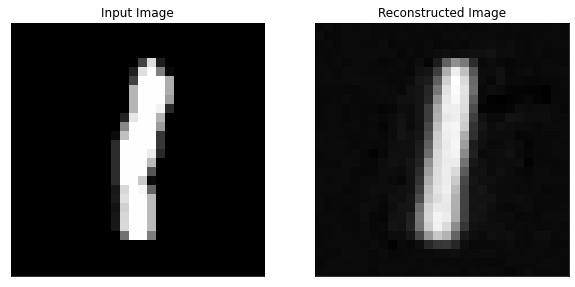

In [10]:
# Visualize Evaluation on Test Data


plt.figure(figsize = (10, 8))
plt.subplot(1,2,1)
plt.imshow(test_img.reshape(28,28), 'gray')
plt.title('Input Image', fontsize = 12)

plt.xticks([])
plt.yticks([])
plt.subplot(1,2,2)
plt.imshow(reconst_img.reshape(28,28), 'gray')
plt.title('Reconstructed Image', fontsize = 12)
plt.xticks([])
plt.yticks([])

plt.show()

# 4. Latent Space and Generation

- To see the distribution of latent variables, we make a projection of 784-dimensional image space onto 2-dimensional latent space

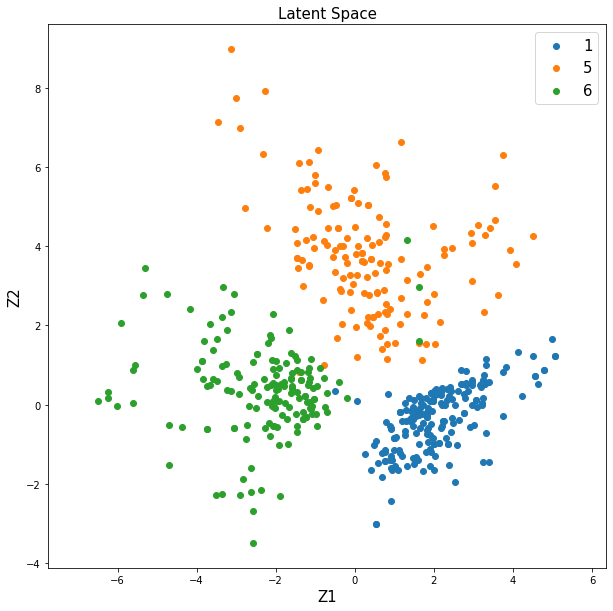

In [12]:


plt.figure(figsize = (10,10))
plt.scatter(rnd_latent[rnd_y == 1, 0], rnd_latent[rnd_y == 1, 1], label = '1')
plt.scatter(rnd_latent[rnd_y == 5, 0], rnd_latent[rnd_y == 5, 1], label = '5')
plt.scatter(rnd_latent[rnd_y == 6, 0], rnd_latent[rnd_y == 6, 1], label = '6')
plt.title('Latent Space', fontsize = 15)
plt.xlabel('Z1', fontsize = 15)
plt.ylabel('Z2', fontsize = 15)
plt.legend(fontsize = 15)
plt.axis('equal')
plt.show()

__Data Generation__

- It generates something that makes sense.

- These results are unsatisfying, because the density model used on the latent space ℱ is too simple and inadequate.

- Building a “good” model amounts to our original problem of modeling an empirical distribution, although it may now be in a lower dimension space.

- This is a motivation to VAE or GAN.


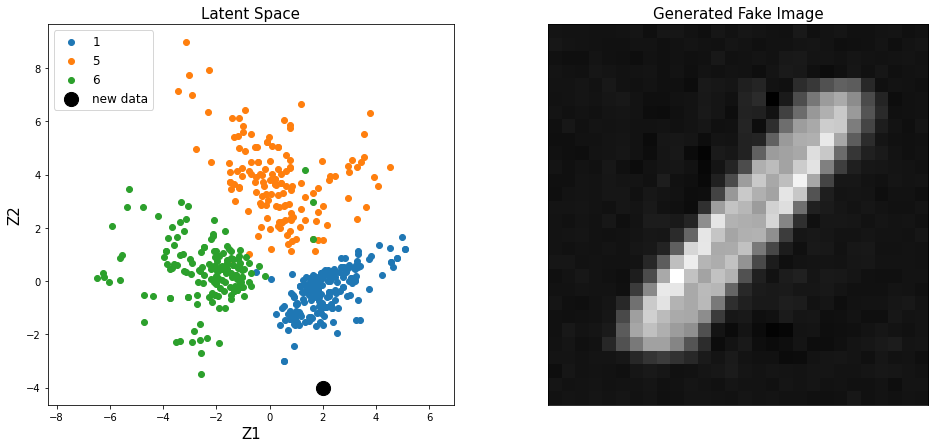

In [13]:


plt.figure(figsize = (16,7))
plt.subplot(1,2,1)
plt.scatter(rnd_latent[rnd_y == 1, 0], rnd_latent[rnd_y == 1, 1], label = '1')
plt.scatter(rnd_latent[rnd_y == 5, 0], rnd_latent[rnd_y == 5, 1], label = '5')
plt.scatter(rnd_latent[rnd_y == 6, 0], rnd_latent[rnd_y == 6, 1], label = '6')
plt.scatter(new_latent[:,0], new_latent[:,1], c = 'k', marker = 'o', s = 200, label = 'new data')
plt.title('Latent Space', fontsize = 15)
plt.xlabel('Z1', fontsize = 15)
plt.ylabel('Z2', fontsize = 15)
plt.legend(loc = 2, fontsize = 12)
plt.axis('equal')
plt.subplot(1,2,2)
plt.imshow(fake_img.reshape(28,28), 'gray')
plt.title('Generated Fake Image', fontsize = 15)
plt.xticks([])
plt.yticks([])
plt.show()

In [14]:
%%javascript
$.getScript('https://kmahelona.github.io/ipython_notebook_goodies/ipython_notebook_toc.js')

<IPython.core.display.Javascript object>